### Prologue
Prepare the notebook for inline plotting<br>
Load required libraries<br>
Create custom functions<br>
Load and preprocess data<br>
Train a random forest using previously optimized/tuned hyper-parameters

In [2]:
from IPython.display import Image
%matplotlib inline
%run rf_analysis_utils.py
%run rcdv_dataprep.py

Utility code in the associated file performs the following steps:
defines function to print pretty confusion matrix: plot_confusion_matrix()
defines a function to get the class code by label: get_class_code()
defines a function to plot a tree inline: tree_to_code()
defines a function to extract all the structural arrays of a tree: get_tree_structure()
defines a function to extract a metrics dictionary from a random forest: explore_forest()
defines a function to pass batches of data to explore_forest(), split by correct/incorrect prediction: batch_analyse_model()
defines function to plot the mean path lengths from an object returned by explore_forest(): plot_mean_path_lengths()
defines a function to map the path of an instance down a tree: tree_path()
defines a function to map the path of an instance down a tree ensemble: forest_path()
defines a function to find the majority predicted class from object returned by forest_path(): major_class_from_forest_paths()
defines a function to conv

NameError: name 'var_names' is not defined

The data objects are now saved and given a set of generic names ease of use.

In [10]:
# get the correct directory for saved objects
pickle_dir_store = open("pickle_dir.pickle", "rb")
pickle_dir = pickle.load(pickle_dir_store)
pickle_dir_store.close()

# helper function for pickling files
def pickle_path(filename):
    return(pickle_dir + '\\' + filename)

# load up the training set (required because of running from script into Jup Note)
encoder_store = open(pickle_path('encoder.pickle'), "rb")
encoder = pickle.load(encoder_store)
encoder_store.close()

X_train_enc_store = open(pickle_path('X_train_enc.pickle'), "rb")
X_train_enc = pickle.load(X_train_enc_store)
X_train_enc_store.close()

y_train_store = open(pickle_path('y_train.pickle'), "rb")
y_train = pickle.load(y_train_store)
y_train_store.close()


In [11]:
%run rf_analysis_modelprep.py

Time elapsed: 6706.1832 seconds
Parameter tuning (disabled)
Utility code in the associated file performs the following steps:
set random seed for the random forest
fetch the best parameters from model tuning results

Best OOB Cohen's Kappa during tuning: 0.6730
Best parameters: {'min_samples_leaf': 25, 'max_depth': 32, 'n_estimators': 1600}

Training a random forest model using best parameters... (please wait)

Done

Created helper function enc_model(). A pipeline: feature encoding -> rf model


### Random Forest Performance

Cohen's Kappa on unseen instances: 0.1948
Confusion matrix, without normalization
[[3172  376]
 [1524  591]]
Normalized confusion matrix
[[0.89 0.11]
 [0.72 0.28]]


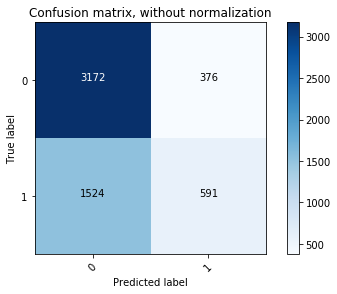

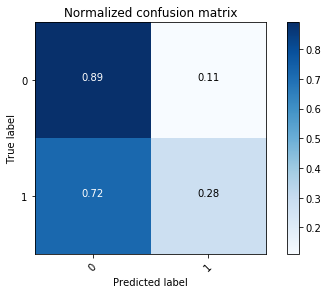

In [12]:
# test the model on unseen data
pred = enc_model.predict(X_test)
print("Cohen's Kappa on unseen instances: " "{:0.4f}".format(metrics.cohen_kappa_score(y_test, pred)))

# view the confusion matrix
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.figure()
# normalized confusion matrix
plot_confusion_matrix(cm
                      , classes=class_names
                      , normalize=True,
                      title='Normalized confusion matrix')

# Part 1. Global Explanations
## Statistical Analysis of a random forest model using data batches
* Inductive Properties are based on the training data
* Transductive Properties are based on the test (held out) data
* In both cases, the whole dataset is passed into the model and statistics are gathered about how frequently the features are visited.

* OOB data (to do)

In [13]:
# First instantiate new survey class with the RF model
f_survey = forest_surveyor(model = rf, features = onehot_features, prediction_model = enc_model)

In [15]:
########################################################################
### This takes a few minutes, so only run when an update is required ###
########################################################################

if True:
    '''
    batch = X_test
    labels = y_test

    correct_preds = enc_model.predict(batch) == labels
    incorrect_preds = enc_model.predict(batch) != labels
    
    if sum(correct_preds) > 0:
        X = batch[correct_preds.values]
        y = labels[correct_preds.values]
        
        f_survey.fit(encoder.transform(X), y, onehot_features)
        f_cor_stats = f_survey.forest_stats(np.unique(y))
        
    if sum(incorrect_preds) > 0:
        X = batch[incorrect_preds.values]
        y = labels[incorrect_preds.values]
        
        f_survey.fit(encoder.transform(X), y, onehot_features)
        f_incor_stats = f_survey.forest_stats(np.unique(y))
    
    tt_correct_stats_store = open(pickle_path('tt_correct_stats.pickle'), "wb")
    pickle.dump(f_cor_stats, tt_correct_stats_store)
    tt_correct_stats_store.close()
    
    tt_incorrect_stats_store = open(pickle_path('tt_incorrect_stats.pickle'), "wb")
    pickle.dump(f_incor_stats, tt_incorrect_stats_store)
    tt_incorrect_stats_store.close()
    '''
    
tt_correct_stats_store = open(pickle_path('tt_correct_stats.pickle'), "rb")
tt_correct_stats = pickle.load(tt_correct_stats_store)
tt_correct_stats_store.close()

tt_incorrect_stats_store = open(pickle_path('tt_incorrect_stats.pickle'), "rb")
tt_incorrect_stats = pickle.load(tt_incorrect_stats_store)
tt_incorrect_stats_store.close()

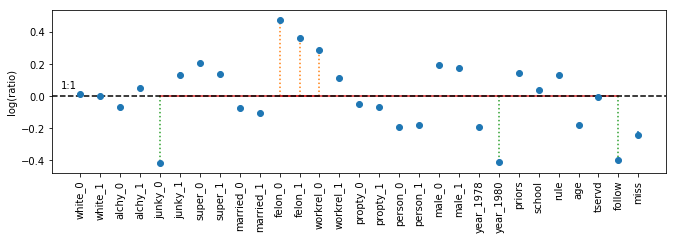

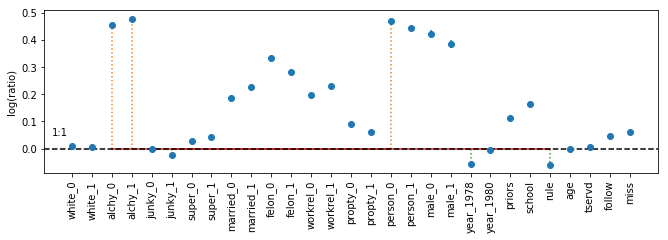

In [16]:
log_ratio = log_ratio_plot(num = tt_correct_stats[0]['m_child_traversals']
                            , num_err = tt_correct_stats[0]['se_child_traversals']
                            , denom = tt_incorrect_stats[0]['m_child_traversals']
                            , denom_err = tt_incorrect_stats[0]['se_child_traversals']
                            , labels = onehot_features
)
log_ratio = log_ratio_plot(num = tt_correct_stats[0]['m_lower_traversals']
                            , num_err = tt_correct_stats[0]['se_lower_traversals']
                            , denom = tt_incorrect_stats[0]['m_lower_traversals']
                            , denom_err = tt_incorrect_stats[0]['se_lower_traversals']
                            , labels = onehot_features
)

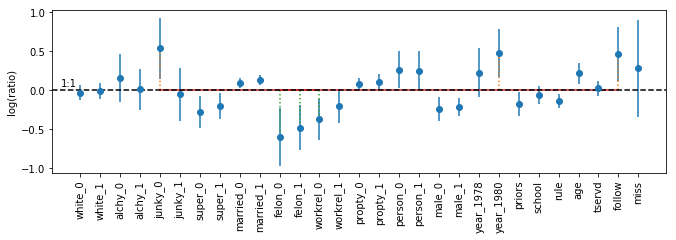

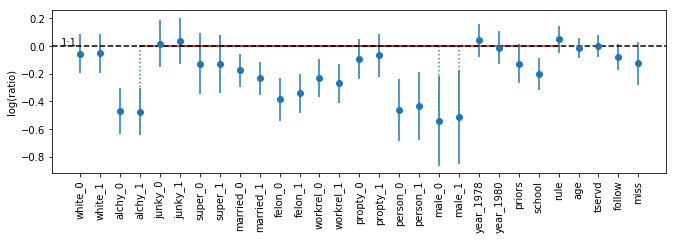

In [17]:
log_ratio = log_ratio_plot(num = tt_correct_stats[1]['m_child_traversals'],
                           denom = tt_correct_stats[0]['m_child_traversals'],
                           num_err = tt_correct_stats[1]['sd_child_traversals'],
                           denom_err = tt_correct_stats[0]['sd_child_traversals'],
                           labels = onehot_features)

log_ratio = log_ratio_plot(num = tt_correct_stats[1]['m_lower_traversals'],
                           denom = tt_correct_stats[0]['m_lower_traversals'],
                           num_err = tt_correct_stats[1]['sd_lower_traversals'],
                           denom_err = tt_correct_stats[0]['sd_lower_traversals'],
                           labels = onehot_features)

# Part 2. Local Explanations
## Analysis of decision paths for individual unseen instances in a random forest model
* Frequent Pattern Mining of decision paths
* Rule Compression of decision paths

In [18]:
first_n = 14 # python is 'up to but not including'

batch = X_test[0:first_n]
labels = y_test[0:first_n]

preds = enc_model.predict(batch)

nfp = forest_path(forest = rf
                , feature_names = onehot_features
                , instances = batch
                , labels = None
                , feature_encoding = encoder
                , by_tree = False)

paths = {}
for instance in range(first_n):
    paths[instance] = get_paths(nfp, instance, by_tree = False, which_trees='majority')

# there is a bug in sklearn causing all the warnings. This should be fixed in next release.
pretty_print_tree_votes(paths, preds, labels)

Instance 0:    True Class = 0 0    Pred Class = 0 0    Majority voting trees = 1533
Instance 1:    True Class = 0 0    Pred Class = 0 0    Majority voting trees = 1349
Instance 2:    True Class = 1 1    Pred Class = 0 0    Majority voting trees = 1317
Instance 3:    True Class = 0 0    Pred Class = 0 0    Majority voting trees = 1225
Instance 4:    True Class = 0 0    Pred Class = 0 0    Majority voting trees = 1422
Instance 5:    True Class = 0 0    Pred Class = 0 0    Majority voting trees = 1380
Instance 6:    True Class = 1 1    Pred Class = 0 0    Majority voting trees = 1385
Instance 7:    True Class = 1 1    Pred Class = 0 0    Majority voting trees = 1236
Instance 8:    True Class = 0 0    Pred Class = 0 0    Majority voting trees = 849
Instance 9:    True Class = 1 1    Pred Class = 0 0    Majority voting trees = 1545
Instance 10:    True Class = 1 1    Pred Class = 0 0    Majority voting trees = 1221
Instance 11:    True Class = 0 0    Pred Class = 0 0    Majority voting tree

C:\Dev\Prog\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Dev\Prog\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Dev\Prog\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Dev\Prog\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future thi

In [20]:
# profiling a single instance
instance = 1

# Collect useful data for instance
true_class = labels[instance:instance+1].values[0]
pred_probs = enc_model.predict_proba(batch[instance:instance + 1])[0]

print('Test instance id: ' + str(instance))
print('True class: ' + str(true_class))
print('Pedicted Class Probabilities ')
for c, n, p in zip(class_names, range(len(class_names)), pred_probs):
    print(n, c, "{:0.4f}".format(p))

# get the class codes produced by the model and the true class
true_class_code = get_label(class_col, true_class)

class_code_confs = np.argsort(pred_probs)[::-1] # descending order
pred_class_code = get_code(class_col, class_names[class_code_confs[0]])
second_class_code = get_code(class_col, class_names[class_code_confs[1]])

# Display instance row
germ_id = batch[instance:instance + 1].index[0]
rcdv[germ_id:germ_id + 1]

Test instance id: 1
True class: 0
Pedicted Class Probabilities 
0 0 0.6895
1 1 0.3105


C:\Dev\Prog\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,white,alchy,junky,super,married,felon,workrel,propty,person,male,priors,school,rule,age,tservd,follow,miss,year,recid
5972,0,1,0,0,0,0,1,0,0,1,12,5,0,607,8,70,0,1978,1


C:\Dev\Study\python\interpret_basics2\rf_analysis_utils.py:925: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(lowers, lower_bins)[0]).round(2)
C:\Dev\Study\python\interpret_basics2\rf_analysis_utils.py:921: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(uppers, upper_bins)[0]).round(2)


No frequent patterns longer than 2 items. Stopping early.
('priors', False, 0.69) feature first added
('rule', True, 1.19) feature first added
('rule', True, 1.19) feature appears already
('rule', True, 1.19) feature values appears already
('age', False, 377.83) feature first added
('rule', True, 1.19) feature appears already
('rule', True, 1.19) feature values appears already
('age', False, 616.13) feature appears already
('age', False, 616.13) feature values appears already
('rule', True, 1.19) feature appears already
('rule', True, 1.19) feature values appears already
('school', True, 11.52) feature first added
('tservd', False, 17.83) feature first added


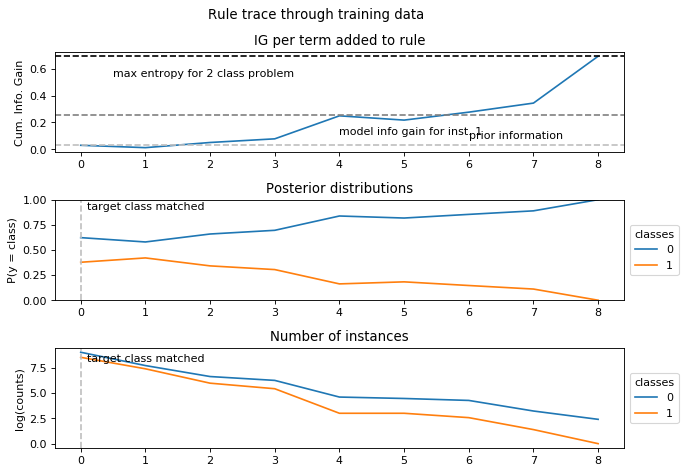

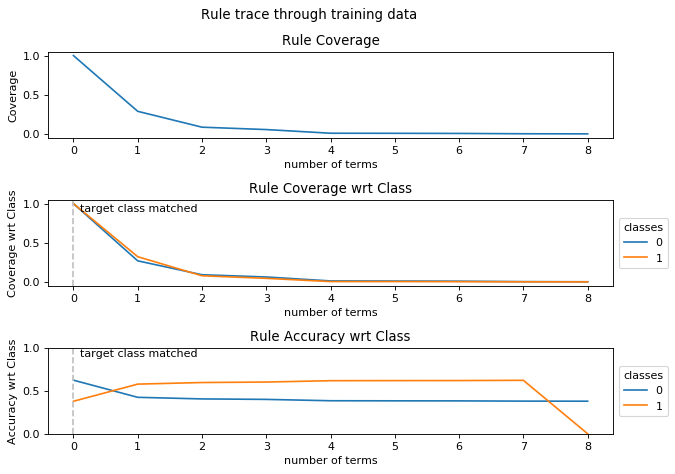

No frequent patterns longer than 2 items. Stopping early.
('priors', False, 0.69) feature first added
('rule', True, 1.18) feature first added
('rule', True, 1.18) feature appears already
('rule', True, 1.18) feature values appears already
('age', False, 376.81) feature first added
('rule', True, 1.18) feature appears already
('rule', True, 1.18) feature values appears already
('rule', True, 1.18) feature appears already
('rule', True, 1.18) feature values appears already
('rule', True, 1.18) feature appears already
('rule', True, 1.18) feature values appears already
('school', True, 11.52) feature first added
('priors', False, 5.96) feature appears already
('priors', False, 5.96) feature values appears already
('age', False, 615.3) feature appears already
('age', False, 615.3) feature values appears already
('tservd', False, 17.42) feature first added


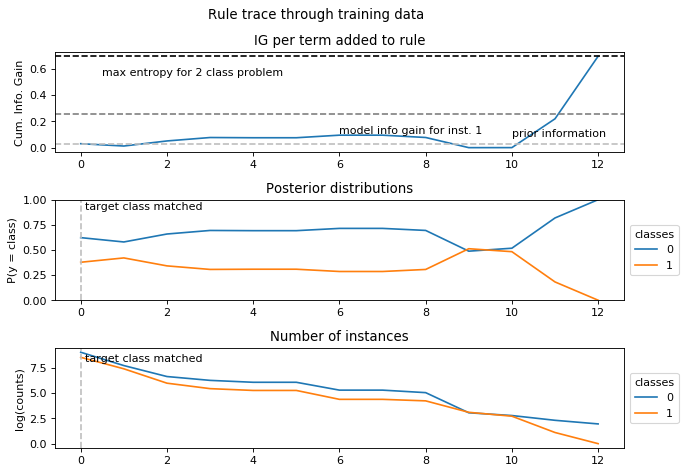

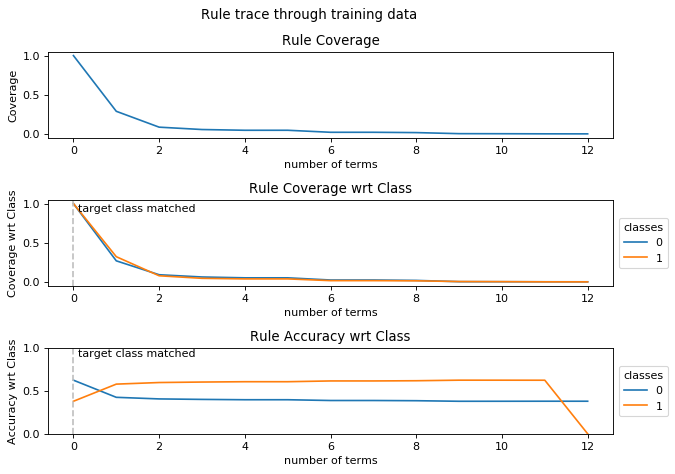

In [42]:
# training data - could be a representative sample if original tr is too large or unavailable
training_data = X_train
training_labels = y_train

# MAJORITY
# generate a set of paths, sorting can be tuned
sorted_fp = get_sorted_fp(discretize_paths(get_paths(nfp, instance, by_tree = False, which_trees='majority')
                                           , vars_dict, 4),
                                 support = 0.1, max_itemset_size = 6, alpha = 0.0)
# create the rule accumulator
ra = rule_accumulator(vars_dict=vars_dict, onehot_dict = onehot_dict, rule_list=sorted_fp)

# run the profile
ra, model_votes = profile_instance(instance=instance, target_class=0
                                     , fp_object = nfp
                                     , rule_acc = ra
                                     , training_data = encoder.transform(training_data)
                                     , training_labels = training_labels
                                     , features = onehot_features
                                     , class_names = class_names
                                     , stopping_param = 1)

# MINORITY
# generate a set of paths, sorting can be tuned
sorted_fp_min = get_sorted_fp(discretize_paths(get_paths(nfp, instance, by_tree = False, which_trees='minority')
                                               , vars_dict, 4),
                                 support = 0.1, max_itemset_size = 6, alpha = 0.0)

# create the rule accumulator
ra_min = rule_accumulator(vars_dict=vars_dict, onehot_dict = onehot_dict, rule_list=sorted_fp_min)

# run the profile
ra_min, model_votes = profile_instance(instance=instance, target_class=0
                                     , fp_object = nfp
                                     , rule_acc = ra_min
                                     , training_data = encoder.transform(training_data)
                                     , training_labels = training_labels
                                     , features = onehot_features
                                     , class_names = class_names
                                     , stopping_param = 1)

In [39]:
pretty_print(ra.rule, onehot_dict)

['amt <= 1777.39',
 'chk_A14 False',
 'crhis_A31 False',
 'hous_A152 False',
 'prop_A121 False',
 'crhis_A32 True',
 'pps_A40 False',
 'pps_A43 False',
 'emp_A74 True']

In [13]:
ra.prune_rule()
pretty_print(ra.pruned_rule)

['crhis_A30 False',
 'crhis_A31 False',
 'job_A174 True',
 'tel_A192 True',
 'emp_A75 True',
 'pers_A93 True',
 'chk_A12 True']

In [14]:
p_count(training_labels.loc[apply_rule(ra.pruned_rule, encoder.transform(training_data), onehot_features)].values)

{'counts': array([1], dtype=int64),
 'labels': array([1], dtype=int64),
 'p_counts': array([1.])}

In [15]:
ra.pruned_rule

[('crhis_A30', True, 0.5),
 ('crhis_A31', True, 0.5),
 ('job_A174', False, 0.5),
 ('tel_A192', False, 0.5),
 ('emp_A75', False, 0.5),
 ('pers_A93', False, 0.5),
 ('chk_A12', False, 0.5)]

In [16]:
p_count(training_labels.loc[apply_rule([
 ('crhis_A30', True, 0.5),
 ('crhis_A31', True, 0.5),
 ('job_A174', False, 0.5),
 ('tel_A192', False, 0.5),
 ('emp_A75', False, 0.5),
 #('pers_A93', False, 0.5),
 ('chk_A12', False, 0.5)
], encoder.transform(training_data), onehot_features)].values)

{'counts': array([2, 1], dtype=int64),
 'labels': array([0, 1], dtype=int64),
 'p_counts': array([0.66666667, 0.33333333])}

In [17]:
ra4 = rule_accumulator(vars_dict=vars_dict, onehot_dict = onehot_dict, rule_list=sorted_fp_min)
for i in range(4):
    ra4.add_rule()
ra4.prune_rule()
pretty_print(ra4.pruned_rule)

['job_A173 False',
 'chk_A11 False',
 'crhis_A31 False',
 'hous_A153 True',
 'chk_A14 False']

In [18]:
p_count(training_labels.loc[apply_rule(ra4.pruned_rule, encoder.transform(training_data), onehot_features)].values)

{'counts': array([5, 4], dtype=int64),
 'labels': array([0, 1], dtype=int64),
 'p_counts': array([0.55555556, 0.44444444])}

In [19]:
pretty_print(ra_min.rule)

['job_A173 False',
 'chk_A11 False',
 'crhis_A31 False',
 'hous_A153 True',
 'chk_A14 False',
 'hous_A151 False',
 'crhis_A30 False',
 'tel_A191 False',
 'plans_A141 False',
 'crhis_A34 False',
 'prop_A121 False',
 'pps_A42 False',
 'chk_A13 False',
 'job_A172 False',
 'chk_A12 True',
 'tel_A192 True',
 'pers_A91 False',
 'svng_A62 False']

In [20]:
ra_min.prune_rule()
pretty_print(ra_min.pruned_rule)

['job_A173 False',
 'crhis_A31 False',
 'hous_A153 True',
 'crhis_A30 False',
 'plans_A141 False',
 'crhis_A34 False',
 'prop_A121 False',
 'pps_A42 False',
 'job_A172 False',
 'chk_A12 True',
 'tel_A192 True',
 'pers_A91 False',
 'svng_A62 False']

In [21]:
p_count(training_labels.loc[apply_rule(ra_min.pruned_rule, encoder.transform(training_data), onehot_features)].values)

{'counts': array([1], dtype=int64),
 'labels': array([0], dtype=int64),
 'p_counts': array([1.])}

In [22]:
pretty_print(ra_min.tight_rule)

['hous_A153 True', 'chk_A12 True', 'tel_A192 True']

In [23]:
p_count(training_labels.loc[apply_rule(ra_min.tight_rule, encoder.transform(training_data), onehot_features)].values)

{'counts': array([7, 6], dtype=int64),
 'labels': array([0, 1], dtype=int64),
 'p_counts': array([0.53846154, 0.46153846])}

# Part 3. Other Demos

## treeinterpreter - local explanations from conditional probabilities

In [24]:
from treeinterpreter import treeinterpreter as ti, utils
prediction, bias, contributions = ti.predict(rf, encoder.transform(batch[instance:instance + 1]))

interp_cols = sum([['predictor'], class_names, ['abseff']], [])
interp = pd.DataFrame(columns=interp_cols)
# now extract contributions for each instance
for c, feature in zip(contributions[0], onehot_features):
    if any(c != 0):
        vals = c.tolist()
        vals.insert(0, feature)
        vals.append(sum(abs(c)))
        interp = interp.append(dict(zip(interp_cols, vals))
                               , ignore_index=True)

In [25]:
interp = interp.sort_values('abseff', ascending=False).reset_index().drop('index', axis=1)
interp

,predictor,bad,good,abseff
0,chk_A14,0.062797,-0.062797,0.125594
1,prop_A124,0.046222,-0.046222,0.092444
2,chk_A11,-0.044415,0.044415,0.088830
3,hous_A152,0.038430,-0.038430,0.076860
4,chk_A12,0.037675,-0.037675,0.075350
5,crhis_A34,0.029607,-0.029607,0.059213
6,hous_A153,0.025427,-0.025427,0.050853
7,pers_A93,-0.021552,0.021552,0.043104
8,pers_A92,-0.017124,0.017124,0.034247
9,pps_A40,0.017075,-0.017075,0.034149


In [26]:
interp = interp.sort_values('bad', ascending=False).reset_index().drop('index', axis=1)
interp

,predictor,bad,good,abseff
0,chk_A14,0.062797,-0.062797,0.125594
1,prop_A124,0.046222,-0.046222,0.092444
2,hous_A152,0.038430,-0.038430,0.076860
3,chk_A12,0.037675,-0.037675,0.075350
4,crhis_A34,0.029607,-0.029607,0.059213
5,hous_A153,0.025427,-0.025427,0.050853
6,pps_A40,0.017075,-0.017075,0.034149
7,emp_A71,0.016832,-0.016832,0.033663
8,emp_A75,0.016410,-0.016410,0.032820
9,svng_A61,0.012191,-0.012191,0.024381


In [27]:
priors = dict(zip(interp_cols[1:],  np.append(bias[0], 1.0)))
priors['predictor'] = 'priors (bias)'
totals = dict(zip(interp_cols[1:],  interp.sum()[1:].values))
totals['predictor'] = 'Total'
preds = dict(zip(interp_cols[1:],  np.append(prediction, 1.0)))
preds['predictor'] = 'P(class)'
interp_totals = pd.DataFrame(columns=interp_cols)
interp_totals = interp_totals.append(priors, ignore_index=True)

interp_totals = interp_totals.append(totals, ignore_index=True)
interp_totals = interp_totals.append(preds, ignore_index=True)
interp_totals

,predictor,bad,good,abseff
0,priors (bias),0.286240,0.713760,1.000000
1,Total,0.198595,-0.198595,1.186652
2,P(class),0.484835,0.515165,1.000000


## LIME

In [28]:
# basic setup
import lime
import lime.lime_tabular as limtab

np.random.seed(seed)

explainer = limtab.LimeTabularExplainer(training_data=np.array(X_train_enc.todense())
                                        , feature_names=onehot_features
                                        , training_labels=y_train
                                        , class_names=class_names
                                        , categorical_features=range(len(onehot_features))
                                        , categorical_names=onehot_features
                                        , mode='classification'
                                        , discretize_continuous=False
                                        , verbose=False)

exp = explainer.explain_instance(np.array(encoder.transform(batch[instance:instance+1]).todense())[0]
                                 , rf.predict_proba
                                 , top_labels=4)

[('chk_A14=0', -0.13334228604117992),
 ('chk_A11=0', 0.11983596920539495),
 ('crhis_A30=0', 0.09678908731356821),
 ('crhis_A31=0', 0.09279887019815443),
 ('pps_A41=0', -0.053125686338286425),
 ('crhis_A34=0', -0.052328018618106334),
 ('debt_A102=0', 0.047639173476681416),
 ('emp_A72=0', 0.047131868528410184),
 ('plans_A143=1', 0.04509749913095561),
 ('plans_A142=0', 0.03899391500106701)]

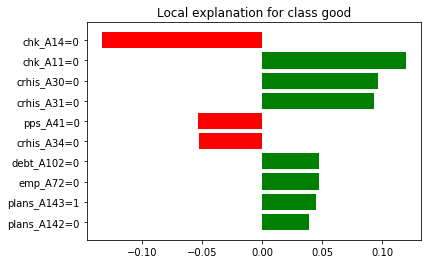

In [29]:
fig = exp.as_pyplot_figure(label=pred_class_code)

exp.as_list(label=pred_class_code)

[('chk_A14=0', 0.13334228604117987),
 ('chk_A11=0', -0.11983596920539495),
 ('crhis_A30=0', -0.09678908731356826),
 ('crhis_A31=0', -0.09279887019815443),
 ('pps_A41=0', 0.053125686338286425),
 ('crhis_A34=0', 0.05232801861810629),
 ('debt_A102=0', -0.047639173476681444),
 ('emp_A72=0', -0.04713186852841017),
 ('plans_A143=1', -0.04509749913095563),
 ('plans_A142=0', -0.03899391500106697)]

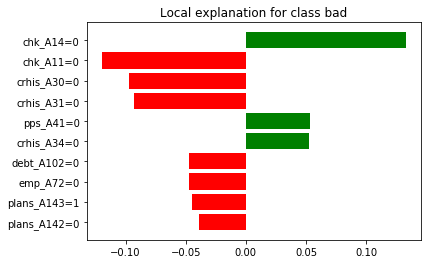

In [30]:
# Show the runner up class details
fig = exp.as_pyplot_figure(label=second_class_code)
exp.as_list(label=second_class_code)

In [31]:
exp.show_in_notebook()